In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [138]:
df = pd.read_json("all_data.json")
df.head()
# df.shape
# df.dtypes

,Available as of,Available date,Construction year,Building condition,Street frontage width,Number of frontages,Surroundings type,Virtual visit,Living area,Living room surface,...,Current monthly revenue,Percentage rented,Venue of the sale,Single session,Terms of visit,Starting price,EPC description,Sea view,Floor,Number of floors
0,After signing the deed,November 12 2022 - 12:00 AM,1899.0,Good,5 m,2.0,Isolated,Link to the virtual visit,122 m² square meters,14 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,After signing the deed,September 15 2022 - 12:00 AM,1941.0,Good,4.44 m,2.0,Urban,NaN,119 m² square meters,32 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,After signing the deed,NaN,1961.0,To renovate,7 m,3.0,"Living area (residential, urban or rural)",NaN,200 m² square meters,45 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,After signing the deed,NaN,1989.0,As new,12 m,4.0,Landscape,NaN,404 m² square meters,55 m² square meters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Depending on the tenant,NaN,1924.0,To be done up,7 m,2.0,NaN,Link to the virtual visit,350 m² square meters,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
list(df.columns)

['Available as of',
 'Available date',
 'Construction year',
 'Building condition',
 'Street frontage width',
 'Number of frontages',
 'Surroundings type',
 'Virtual visit',
 'Living area',
 'Living room surface',
 'Dining room',
 'Kitchen type',
 'Kitchen surface',
 'Bedrooms',
 'Bedroom 1 surface',
 'Bedroom 2 surface',
 'Bathrooms',
 'Shower rooms',
 'Toilets',
 'Office surface',
 'Office',
 'Basement',
 'Attic',
 'Furnished',
 'Surface of the plot',
 'Width of the lot on the street',
 'Connection to sewer network',
 'Gas, water &amp; electricity',
 'Garden surface',
 'Terrace surface',
 'Elevator',
 'Accessible for disabled people',
 'TV cable',
 'Swimming pool',
 'Primary energy consumption',
 'Energy class',
 '',
 'Reference number of the EPC report',
 'CO₂ emission',
 'Yearly theoretical total energy consumption',
 'Heating type',
 'Double glazing',
 'Planning permission obtained',
 'Total ground floor buildable',
 'Subdivision permit',
 'Possible priority purchase right',
 'Pro

In [140]:
#Create a new dataframe with selected data

df = df[['url',
        'Living area',
         'Bedrooms',
         'locality',
         'Surface of the plot',
         'Garden',
         'Garden surface',
         'Kitchen type',
         'Swimming pool',
         'Furnished',
         'How many fireplaces?',
         'Terrace',
         'Terrace surface',
         'Number of frontages',
         'Building condition', 
         'Price',
         'type_of_property',
         'subtype_of_property',
         'Elevator',
         'Floor']]



In [141]:
df.head()
print("Rows     : ", df.shape[0])
print("Columns  : ", df.shape[1])
print("\nFeatures : \n", df.columns.tolist())
print("\nMissing values :  ", df.isnull().sum().values.sum())
print("\nUnique values :  \n", df.nunique())

print("df", df.shape)

Rows     :  18479
Columns  :  20

Features : 
 ['url', 'Living area', 'Bedrooms', 'locality', 'Surface of the plot', 'Garden', 'Garden surface', 'Kitchen type', 'Swimming pool', 'Furnished', 'How many fireplaces?', 'Terrace', 'Terrace surface', 'Number of frontages', 'Building condition', 'Price', 'type_of_property', 'subtype_of_property', 'Elevator', 'Floor']

Missing values :   131751

Unique values :  
 url                     17373
Living area               670
Bedrooms                   26
locality                 1860
Surface of the plot      2219
Garden                      1
Garden surface            903
Kitchen type                8
Swimming pool               2
Furnished                   2
How many fireplaces?        8
Terrace                     1
Terrace surface           177
Number of frontages         7
Building condition          6
Price                    1842
type_of_property            3
subtype_of_property        23
Elevator                    2
Floor               

In [142]:
#create ID in the new datframe (from the URL)
df["id"] = df["url"].str.split("/").str[9]
df["id"] = df["id"].apply(lambda x: str(x).split('?')).str[0]
#print(df["id"])
print(df["id"].nunique())
df["id"].count()


17373


18479

In [143]:
#info point
def give_info(data):

    info = (pd.concat([data.dtypes,
                   data.nunique(),
                   data.isnull().sum()],axis=1))
    info = info.rename(columns={0:'dtypes',
                            1:'nuniques', # amount of possible values , 'cardinality' of variable
                            2:'isna_sum'}) # amount of null values

    return info

info = give_info(df)
info

,dtypes,nuniques,isna_sum
url,object,17373,0
Living area,object,670,1374
Bedrooms,float64,26,402
locality,object,1860,0
Surface of the plot,object,2219,9508
Garden,object,1,16266
Garden surface,object,903,14121
Kitchen type,object,8,4671
Swimming pool,object,2,10524
Furnished,object,2,4322


In [144]:
#Remove duplicates ID
df = df.drop_duplicates(subset="id")
df.shape
info

,dtypes,nuniques,isna_sum
url,object,17373,0
Living area,object,670,1374
Bedrooms,float64,26,402
locality,object,1860,0
Surface of the plot,object,2219,9508
Garden,object,1,16266
Garden surface,object,903,14121
Kitchen type,object,8,4671
Swimming pool,object,2,10524
Furnished,object,2,4322


In [145]:
df = df[['id',
        'Living area',
         'Bedrooms',
         'locality',
         'Surface of the plot',
         'Garden',
         'Garden surface',
         'Kitchen type',
         'Swimming pool',
         'Furnished',
         'How many fireplaces?',
         'Terrace',
         'Terrace surface',
         'Number of frontages',
         'Building condition', 
         'Price',
         'type_of_property',
         'subtype_of_property',
         'Elevator',
         'Floor']]

give_info(df)

,dtypes,nuniques,isna_sum
id,object,17373,0
Living area,object,670,1311
Bedrooms,float64,26,373
locality,object,1860,0
Surface of the plot,object,2219,8755
Garden,object,1,15265
Garden surface,object,903,13204
Kitchen type,object,8,4424
Swimming pool,object,2,9984
Furnished,object,2,4074


In [146]:
df.shape


(17373, 20)

In [147]:
df.columns = df.columns.str.replace(' ','_') #proprer call columns
df.columns= df.columns.str.lower() #lower case columns names
df.columns= df.columns.str.replace('?','')
list(df.columns)

/var/folders/y9/x007ynb92t57yt7s517ct53w0000gn/T/ipykernel_28210/2228188739.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns= df.columns.str.replace('?','')


['id',
 'living_area',
 'bedrooms',
 'locality',
 'surface_of_the_plot',
 'garden',
 'garden_surface',
 'kitchen_type',
 'swimming_pool',
 'furnished',
 'how_many_fireplaces',
 'terrace',
 'terrace_surface',
 'number_of_frontages',
 'building_condition',
 'price',
 'type_of_property',
 'subtype_of_property',
 'elevator',
 'floor']

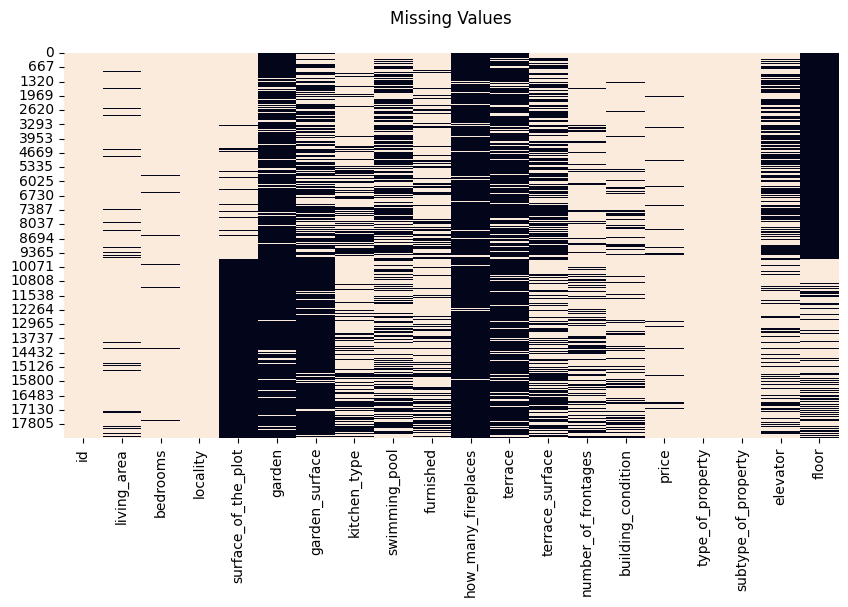

In [148]:
plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(df.notnull(), cbar=False)
plt.show()
#black lines are missing values

In [149]:
df["living_area_sqm"] = df["living_area"].str.split(" ").str[0]
df["living_area_sqm"] = df["living_area_sqm"].astype(int)
df["living_area_sqm"].sort_values()


ValueError: cannot convert float NaN to integer

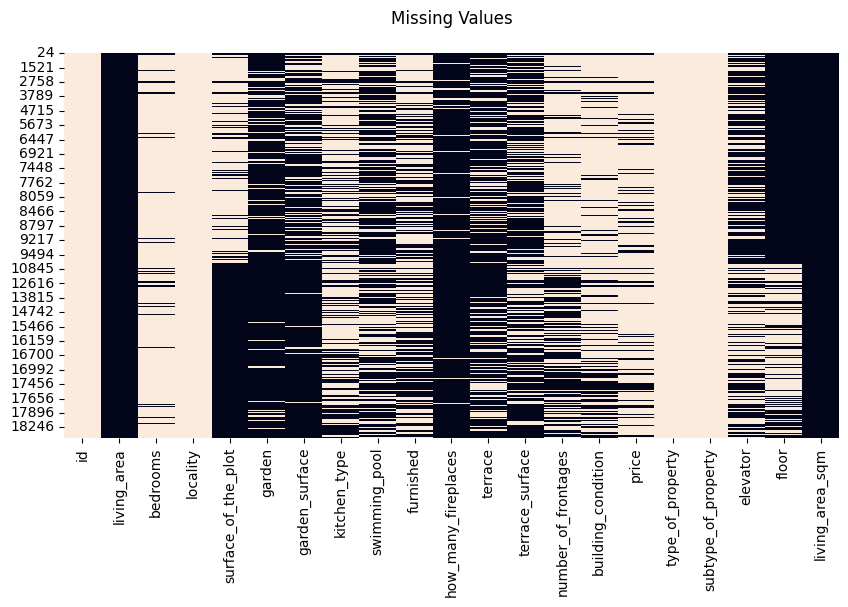

In [ ]:
#scout missing values for living_area w.o value.
dfnullsqm = df[df["living_area_sqm"].isnull()]

plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(dfnullsqm.notnull(), cbar=False)
plt.show()

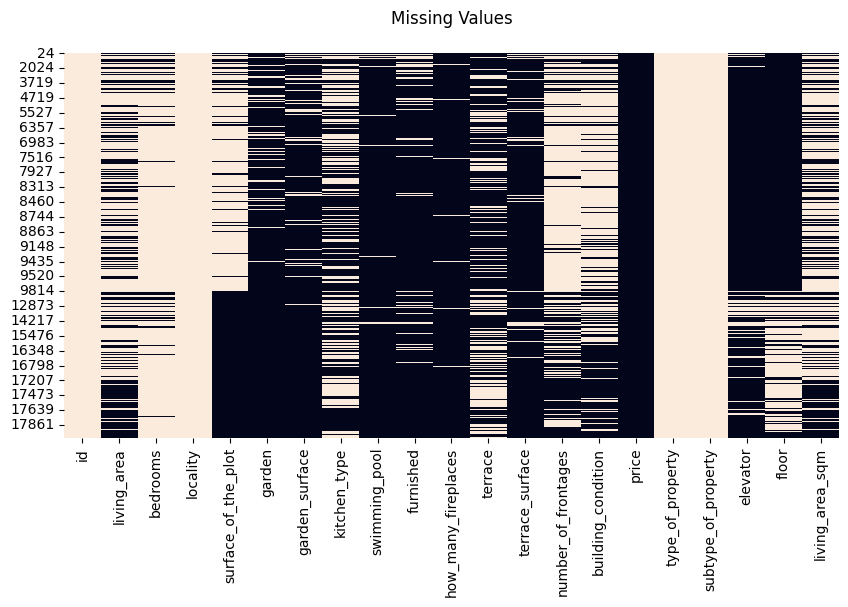

,dtypes,nuniques,isna_sum
url,object,17373,0
Living area,object,670,1374
Bedrooms,float64,26,402
locality,object,1860,0
Surface of the plot,object,2219,9508
Garden,object,1,16266
Garden surface,object,903,14121
Kitchen type,object,8,4671
Swimming pool,object,2,10524
Furnished,object,2,4322


In [ ]:
#scout missing values for price w.o value.
dfnullprice = df[df["price"].isnull()]

plt.figure(figsize=(10, 5))
plt.title('Missing Values\n')
sns.heatmap(dfnullprice.notnull(), cbar=False)
plt.show()
info